In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Versões dos pacotes usadas neste Jupyter Notebook
!python --version
%reload_ext watermark
%watermark -a "Mentoria DSA" --iversions

Python 3.7.3
Author: Mentoria DSA

pandas    : 0.24.2
seaborn   : 0.9.0
numpy     : 1.16.2
matplotlib: 3.0.3



In [3]:
# Carregamento do dataset
df = pd.read_csv("df_nan.csv")

In [4]:
# Mostra do dataset
df.head()

,created_on,property_type,place_name,price,price_aprox_local_currency,price_aprox_usd,surface_covered_in_m2,price_usd_per_m2,price_per_m2,rooms,Estado,Cidade,Bairro
0,2013-09-04,apartment,Higienópolis,2000000.0,2019190.68,631273.27,180.0,3507.073722,11111.111111,3,São Paulo,São Paulo,Higienópolis
1,2013-09-04,apartment,Higienópolis,960000.0,969211.52,303011.17,109.0,2779.918991,8807.339450,3,São Paulo,São Paulo,Higienópolis
2,2013-09-04,apartment,Higienópolis,1300000.0,1312473.95,410327.63,130.0,3156.366385,10000.000000,3,São Paulo,São Paulo,Higienópolis
3,2013-09-04,apartment,Perdizes,1050000.0,1060075.11,331418.47,145.0,2285.644621,7241.379310,3,São Paulo,São Paulo,Perdizes
4,2013-09-04,house,Perdizes,1200000.0,1211514.40,378763.96,218.0,1737.449358,5504.587156,2,São Paulo,São Paulo,Perdizes


In [5]:
# verificação dos tipos de variáveis
df.dtypes

created_on                     object
property_type                  object
place_name                     object
price                         float64
price_aprox_local_currency    float64
price_aprox_usd               float64
surface_covered_in_m2         float64
price_usd_per_m2              float64
price_per_m2                  float64
rooms                           int64
Estado                         object
Cidade                         object
Bairro                         object
dtype: object

In [6]:
# Transformando o formato da coluna "create_on" em datatime
df['created_on'] = pd.to_datetime(df['created_on'])

In [7]:
# Dimensão do dataframe
df.shape

(266984, 13)

Text(0.5, 1.0, 'Quantidade de Registro por Estado')

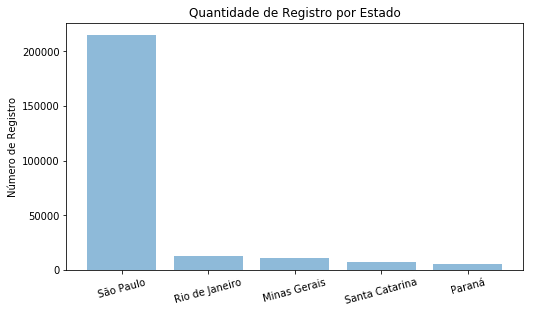

In [8]:
# Cinco maiores estados presentes no dataframe
value_state = df['Estado'].value_counts().head(5).tolist()
name_states = df['Estado'].value_counts().head(5).index.tolist()
w_pos = np.arange(len(name_states))
plt.figure(figsize=(18,10))
plt.subplot(222)
plt.bar(w_pos, value_state, align='center', alpha=0.5)
plt.xticks(w_pos, name_states, rotation=15)
plt.ylabel('Número de Registro')
plt.title('Quantidade de Registro por Estado')

O gráfico representa o maior número de estados presentes no dataset. Conforme observado, o estado de São Paulo representa 80% dos dados registrados, nesse dataset. Com isso, o modelo tende a aprender mais com os registros de São Paulo do que com as outras regiões.<br>
Somente com o gráfico acima pode-se concluir que, dentro desse cenário, compensa elaborar um modelo de regressão linear apenas para o estado de São Paulo.

Text(0.5, 1.0, 'Média dos Valores por Cidade de SP (em Milhões)')

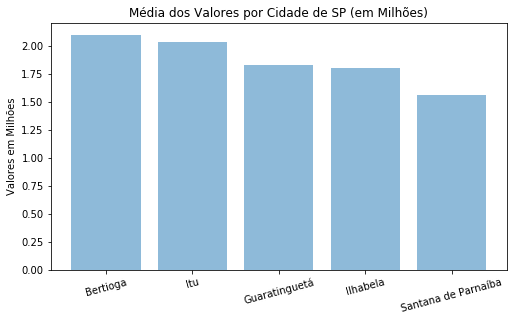

In [9]:
# Top 5 Cidades mais caros de São Paulo (na média), segundo o Dataset
valores = (df[df['Estado'] == "São Paulo"].groupby('Cidade')['price'].mean()/1000000).sort_values(ascending=False).head(5).tolist()
nomes = (df[df['Estado'] == "São Paulo"].groupby('Cidade')['price'].mean()/1000000).sort_values(ascending=False).head(5).index.tolist()
w_pos1 = np.arange(len(nomes))
plt.figure(figsize=(18,10))
plt.subplot(222)
plt.bar(w_pos1, valores, align='center', alpha=0.5)
plt.xticks(w_pos1,nomes, rotation=15)
plt.ylabel("Valores em Milhões")
plt.title("Média dos Valores por Cidade de SP (em Milhões)")

Text(0.5, 1.0, 'Mediana dos Valores por Cidade de SP (em Milhões)')

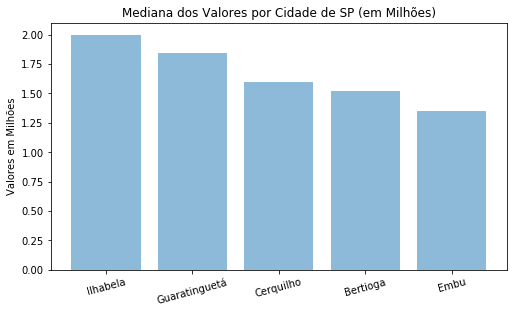

In [10]:
# Top 5 Cidades mais caros de São Paulo (na média), segundo o Dataset
valores = (df[df['Estado'] == "São Paulo"].groupby('Cidade')['price'].median()/1000000).sort_values(ascending=False).head(5).tolist()
nomes = (df[df['Estado'] == "São Paulo"].groupby('Cidade')['price'].median()/1000000).sort_values(ascending=False).head(5).index.tolist()
w_pos1 = np.arange(len(nomes))
plt.figure(figsize=(18,10))
plt.subplot(222)
plt.bar(w_pos1, valores, align='center', alpha=0.5)
plt.xticks(w_pos1,nomes, rotation=15)
plt.ylabel("Valores em Milhões")
plt.title("Mediana dos Valores por Cidade de SP (em Milhões)")

Os valores das médias e medianas de preços do imóveis, das cidades do gráficos acima, são considerando todos os tipos de imóveis. Ou seja, apartment, house, PH e store.

Text(0.5, 1.0, 'Média dos Valores por Estado (em Milhões)')

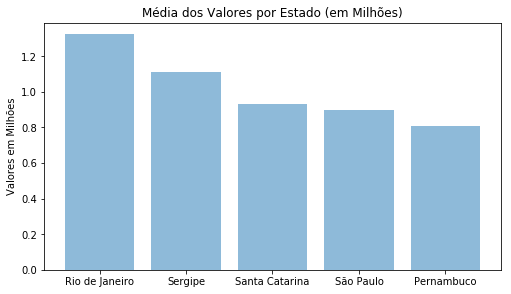

In [11]:
# Preço médio dos imóveis por estado
valores_estado = (df.groupby('Estado')['price'].mean()/1000000).sort_values(ascending=False).head(5).tolist()
nomes_estados = (df.groupby('Estado')['price'].mean()/1000000).sort_values(ascending=False).head(5).index.tolist()
w_pos1 = np.arange(len(nomes_estados))
plt.figure(figsize=(18,10))
plt.subplot(221)
plt.bar(w_pos1, valores_estado, align='center', alpha=0.5)
plt.xticks(w_pos1,nomes_estados, rotation=0)
plt.ylabel("Valores em Milhões")
plt.title("Média dos Valores por Estado (em Milhões)")

Apesar do estado de São Paulo representar 80% dos registros, presente nesse dataframe, o estado do Rio de Janeiro apresenta a maior média dos imóveis, por estado. São Paulo corresponde como quarto estado com maior média entre os estados brasileiros.<br>
O gráfico acima não difere os tipos de imóveis, como apartamento ou casa. Essa informação é extraída nos gráficos seguintes.

In [12]:
# Definindo a média dos preços por tipo de imóvel
print("\tMédias em Milhões\n")
for i in df[df.columns[1]].unique().tolist():
    a = (df[df['property_type'] == i].groupby('Estado')['price'].mean()/1000000).sort_values(ascending=False).head(5)
    print("Médias da variável", i)
    print(a)
    print('\n')

	Médias em Milhões

Médias da variável apartment
Estado
Rio de Janeiro    1.293047
Sergipe           1.110000
Santa Catarina    0.973757
São Paulo         0.889845
Pernambuco        0.749440
Name: price, dtype: float64


Médias da variável house
Estado
Rio de Janeiro      1.463039
Pernambuco          1.415649
Minas Gerais        1.319322
Bahia               1.207552
Distrito Federal    0.998598
Name: price, dtype: float64


Médias da variável PH
Estado
Distrito Federal     1.377500
São Paulo            0.688216
Paraná               0.683300
Santa Catarina       0.477280
Rio Grande do Sul    0.371250
Name: price, dtype: float64


Médias da variável store
Estado
Pernambuco        1.231000
Santa Catarina    0.784804
São Paulo         0.743250
Paraná            0.658169
Minas Gerais      0.590662
Name: price, dtype: float64




<Figure size 1440x1080 with 0 Axes>

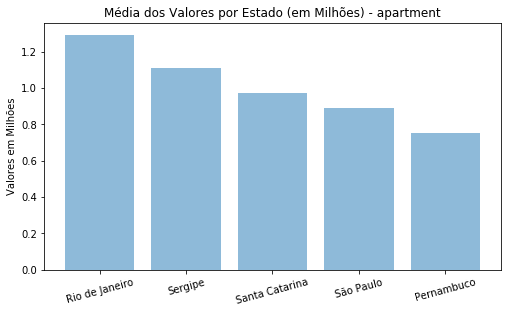

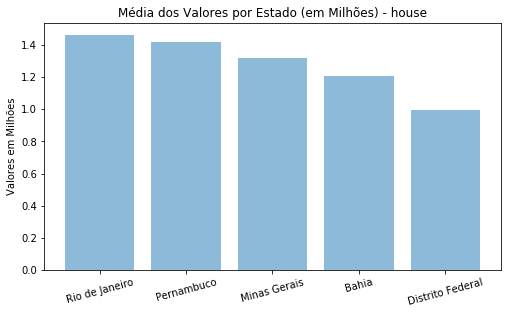

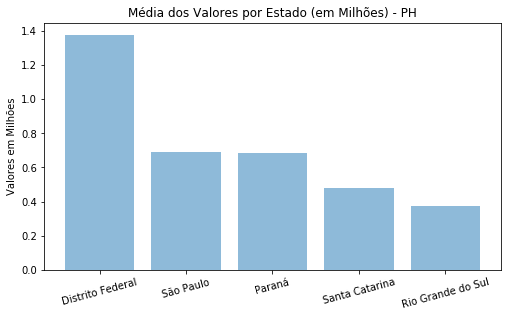

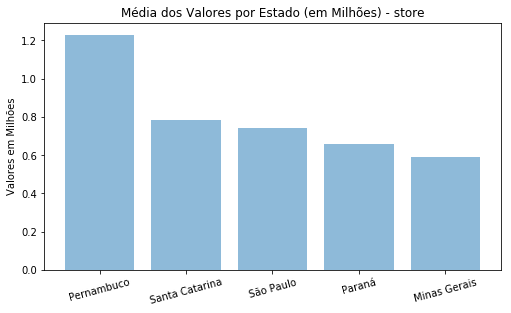

In [13]:
# Colocando as informações acima em gráficos

# Definindo o tamanho da área dos gráficos
plt.figure(figsize=(20,15))

# Definição da posição dos gráficos
subplot = 221

for i in df[df.columns[1]].unique().tolist():
        
    valores_estado = (df[df['property_type'] == i].groupby('Estado')['price'].mean()/1000000).sort_values(ascending=False).head(5).tolist()
    nomes_estados = (df[df['property_type'] == i].groupby('Estado')['price'].mean()/1000000).sort_values(ascending=False).head(5).index.tolist()
    w_pos1 = np.arange(len(nomes_estados))
    plt.figure(figsize=(18,10))
    plt.subplot(subplot)
    plt.bar(w_pos1, valores_estado, align='center', alpha=0.5)
    plt.xticks(w_pos1,nomes_estados, rotation=15)
    plt.ylabel("Valores em Milhões")
    plt.title("Média dos Valores por Estado (em Milhões) - %s" % i)
    subplot = subplot + 1

Os gráficos acima mostram que o estado do Rio de Janeiro, na média, possui as casas e apartamentos mais caros. No entanto, nos tipos de imóveis store e PH, o estado do Rio de Janeiro não está presente na média dos estados mais caros.<br>
Abaixo verifica-se as a média dos preços de cada tipo de imóvel por cidade:

<Figure size 1440x1080 with 0 Axes>

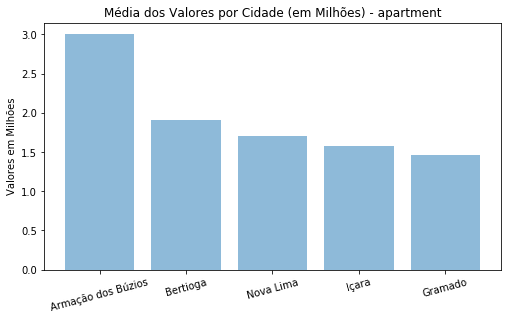

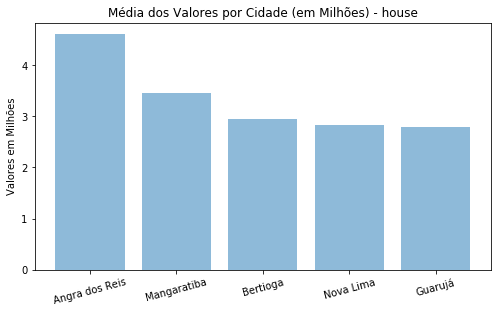

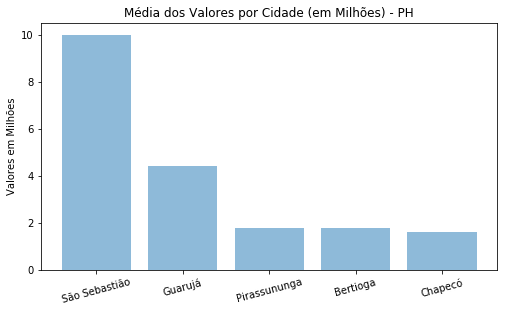

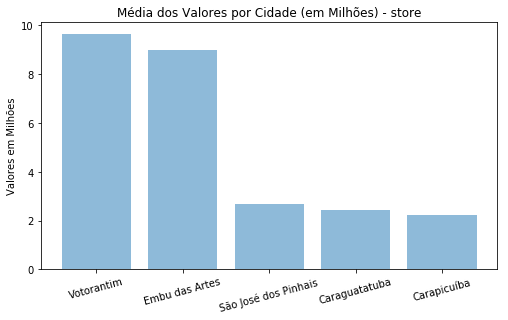

In [14]:
# Colocando as informações acima em gráficos

# Definindo o tamanho da área dos gráficos
plt.figure(figsize=(20,15))

# Definição da posição dos gráficos
subplot = 221

for i in df[df.columns[1]].unique().tolist():
        
    valores = (df[df['property_type'] == i].groupby('Cidade')['price'].mean()/1000000).sort_values(ascending=False).head(5).tolist()
    nomes = (df[df['property_type'] == i].groupby('Cidade')['price'].mean()/1000000).sort_values(ascending=False).head(5).index.tolist()
    w_pos1 = np.arange(len(nomes))
    plt.figure(figsize=(18,10))
    plt.subplot(subplot)
    plt.bar(w_pos1, valores, align='center', alpha=0.5)
    plt.xticks(w_pos1,nomes, rotation=15)
    plt.ylabel("Valores em Milhões")
    plt.title("Média dos Valores por Cidade (em Milhões) - %s" % i)
    subplot = subplot + 1

Considerando a média dos preços dos imóveis por estado, encontra-se abaixo o valor médio de cada tipo de imóvel por cidade (os estados utilizados são os que possuem maior média de preços):

In [15]:
######## TRECHO DE CÓDIGO PARA AJUSTAR #########
# for i in df[df.columns[1]].unique().tolist():
#     print("Tipo de imóvel: ", i)
#     states = (df[df['property_type'] == i].groupby('Estado')['price'].mean()/1000000)\
#             .sort_values(ascending=False).head(5).index.tolist()
#     for cities in states:
#         print("Estado: ", cities)
#         city = (df[df['Estado'] == cities].groupby('Cidade')['price'].mean()/1000000)\
#             .sort_values(ascending=False).head(5).index.tolist()
#         print(city)
#     print("\n")

In [16]:
######## TRECHO DE CÓDIGO PARA AJUSTAR #########
# # Colocando as informações acima em gráficos

# # Separando as variáveis
# apartment_city =  (df[df['property_type'] == 'apartment'].groupby('Estado')['price'].mean()/1000000)\
#             .sort_values(ascending=False).head(5).index.tolist()

# # Definindo o tamanho da área dos gráficos
# plt.figure(figsize=(20,15))

# # Definição da posição dos gráficos
# subplot = 221

# for i in apartment_city:
        
#     valores = (df[df['property_type'] == 'apartment'].groupby('Cidade')['price'].mean()/1000000).sort_values(ascending=False).head(5).tolist()
#     nomes = (df[df['property_type'] == 'apartment'].groupby('Cidade')['price'].median()/1000000).sort_values(ascending=False).head(5).index.tolist()
#     w_pos1 = np.arange(len(nomes))
#     plt.figure(figsize=(18,10))
#     plt.subplot(subplot)
#     plt.bar(w_pos1, valores, align='center', alpha=0.5)
#     plt.xticks(w_pos1,nomes, rotation=15)
#     plt.ylabel("Valores em Milhões")
#     plt.title("Média dos Valores por Cidade (em Milhões) - %s - RJ" % i)
#     subplot = subplot + 1

### Análises dos imóveis por anos

In [17]:
# Para comparar a média dos valores anuais de cada estado,
# necessita criar uma coluna do ano
df['Ano'] = df['created_on'].map(lambda x: x.strftime("%Y"))

In [18]:
df.head()

,created_on,property_type,place_name,price,price_aprox_local_currency,price_aprox_usd,surface_covered_in_m2,price_usd_per_m2,price_per_m2,rooms,Estado,Cidade,Bairro,Ano
0,2013-09-04,apartment,Higienópolis,2000000.0,2019190.68,631273.27,180.0,3507.073722,11111.111111,3,São Paulo,São Paulo,Higienópolis,2013
1,2013-09-04,apartment,Higienópolis,960000.0,969211.52,303011.17,109.0,2779.918991,8807.339450,3,São Paulo,São Paulo,Higienópolis,2013
2,2013-09-04,apartment,Higienópolis,1300000.0,1312473.95,410327.63,130.0,3156.366385,10000.000000,3,São Paulo,São Paulo,Higienópolis,2013
3,2013-09-04,apartment,Perdizes,1050000.0,1060075.11,331418.47,145.0,2285.644621,7241.379310,3,São Paulo,São Paulo,Perdizes,2013
4,2013-09-04,house,Perdizes,1200000.0,1211514.40,378763.96,218.0,1737.449358,5504.587156,2,São Paulo,São Paulo,Perdizes,2013


In [19]:
df.dtypes

created_on                    datetime64[ns]
property_type                         object
place_name                            object
price                                float64
price_aprox_local_currency           float64
price_aprox_usd                      float64
surface_covered_in_m2                float64
price_usd_per_m2                     float64
price_per_m2                         float64
rooms                                  int64
Estado                                object
Cidade                                object
Bairro                                object
Ano                                   object
dtype: object

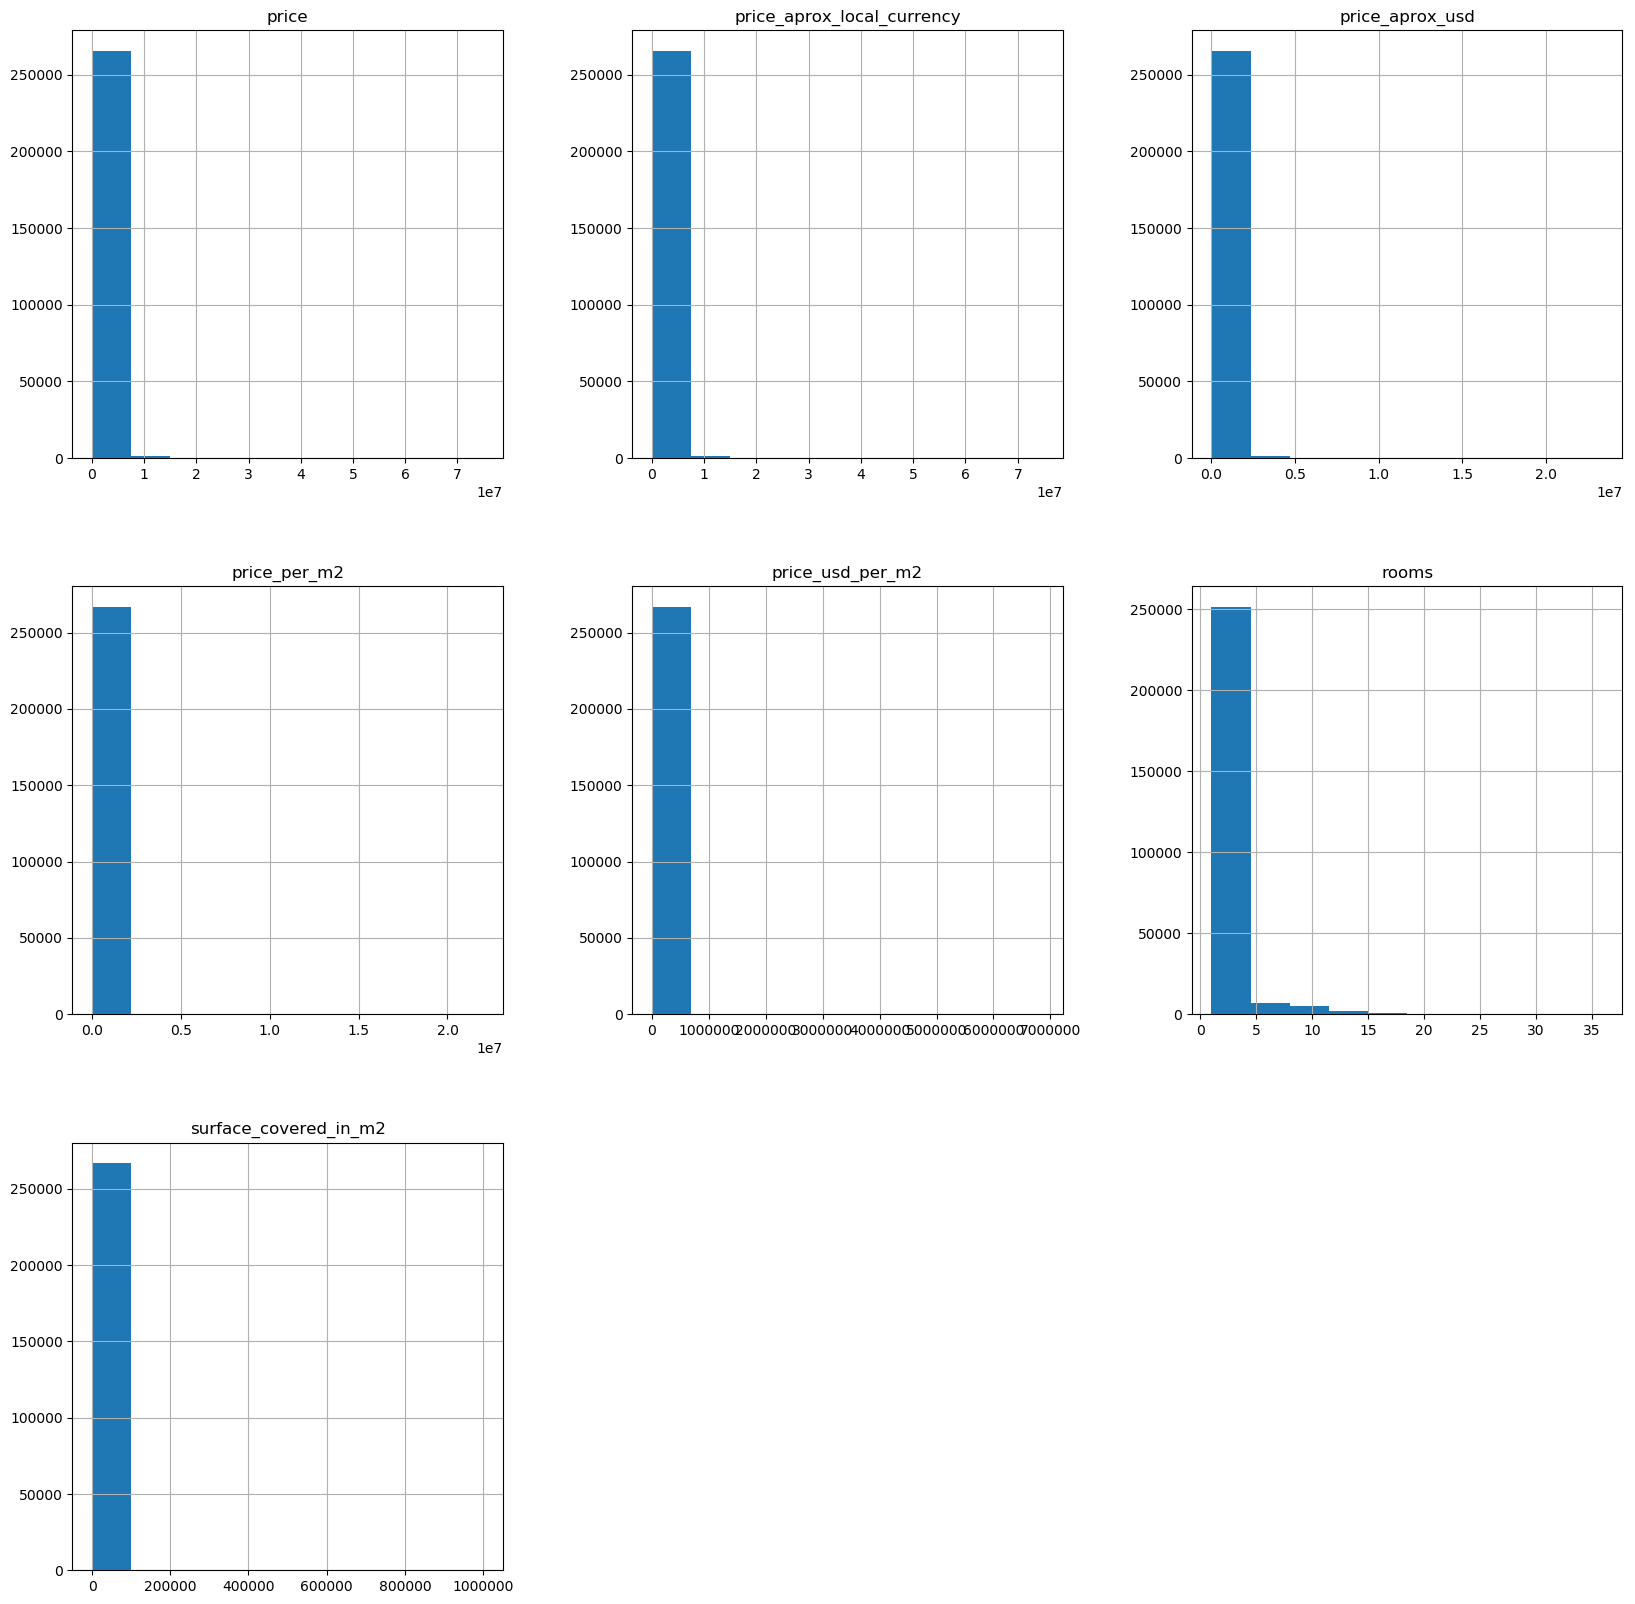

In [20]:
#análise do histograma
plt.style.use("default")
df.hist(layout=(3,3), figsize= (20,20))
plt.show()

### Análise de Correlação

In [21]:
# Correlação entre os dados quantitativos
df.corr()

,price,price_aprox_local_currency,price_aprox_usd,surface_covered_in_m2,price_usd_per_m2,price_per_m2,rooms
price,1.000000,0.999987,0.999987,0.030213,0.085083,0.085171,0.287282
price_aprox_local_currency,0.999987,1.000000,1.000000,0.030192,0.085405,0.085489,0.287522
price_aprox_usd,0.999987,1.000000,1.000000,0.030192,0.085405,0.085489,0.287522
surface_covered_in_m2,0.030213,0.030192,0.030192,1.000000,-0.001453,-0.001458,0.022402
price_usd_per_m2,0.085083,0.085405,0.085405,-0.001453,1.000000,0.999984,0.016335
price_per_m2,0.085171,0.085489,0.085489,-0.001458,0.999984,1.000000,0.016252
rooms,0.287282,0.287522,0.287522,0.022402,0.016335,0.016252,1.000000


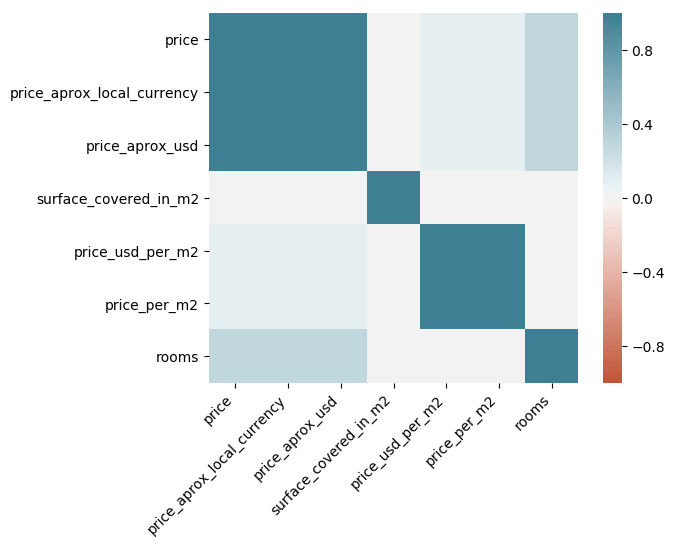

In [22]:
# Correlação entre as variáveis quantitativa de forma gráfica
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);